In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/FashionMNIST_data/', download=True, 
                                 train=True, transform=transform)
validset = datasets.FashionMNIST('~/.pytorch/FashionMNIST_data/', download=True,
                                 train=False, transform=transform)
batch_size = 100
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
validloader = torch.utils.data.DataLoader(validset, batch_size=batch_size, shuffle=True)

### Training and validation function

In [3]:
def train(model, trainloader, validloader, n_epochs=1):
    # Send model to GPU/CPU
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # Training
    batch_loss = []
    for iepoch in range(n_epochs):
        for images, labels in trainloader:
            # Data to GPU/CPU
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad() # Set gradient to zero
            output = model(images) # Forward pass
            loss = criterion(output, labels) # Loss
            loss.backward() # Backpropagation
            optimizer.step() # Update
            # Batch loss
            batch_loss.append(loss.item())
            
    # Validation accuracy
    valid_accuracy = 0
    for images, labels in validloader:
        images, labels = images.to(device), labels.to(device)
        model.eval() # Turn off train mode
        # Predictions
        with torch.no_grad():
            output = model(images)
        output = output.argmax(dim=1)
        output = output.view(*labels.shape)
        equals = (output == labels).float()
        valid_accuracy += torch.mean(equals)
        # Turn on train mode
        model.train()
    valid_accuracy = valid_accuracy/len(validloader)
    return batch_loss, valid_accuracy

### Model

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
    
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

### Training

In [6]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
batch_loss, valid_accuracy = train(model, trainloader, validloader, n_epochs=2)

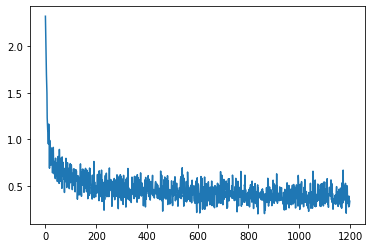

In [8]:
plt.plot(batch_loss)
plt.show()

In [ ]:
def init_weight_zeros(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        m.weight.data.fill_(0)
        m.bias.data.fill_(0)
#         
def init_weight_ones(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        m.weight.data.fill_(1)
        m.bias.data.fill_(0)
#         
def init_weight_uniform(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        m.weight.data.uniform_(0,1)
        m.bias.data.fill_(0)
#         
def init_weight_uniform_center(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        m.weight.data.fill_(0)
        m.bias.data.fill_(0)
#         
def init_weight_normal(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        m.weight.data.normal_(0,1)
        m.bias.data.fill_(0)